<a href="https://colab.research.google.com/github/pranavgupta0001/yorkUCourses/blob/main/phys4060/phys4060_esse4020_project5_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# packages

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import periodogram, correlate, welch, csd, coherence
from numpy.fft import fft, fftfreq

# Series Setup

In [33]:
# Define initial parameters
np.random.seed(52)
num_sinusoids = 7
frequencies = [1, 1.9, 2.5172, 5.2, 8, 10, 16]
amplitudes = [10., 1., 5, 2, 5.5, 7., 8.5]
frequencies2 = [1.5, 2.5, 5.2, 9.52, 15, 18, 24]
amplitudes2 = [1.5, 10, 12.5, 1.75, 3.75, 15., 4]


num_sinusoids = 7
phases = np.random.uniform(0, 2*np.pi, num_sinusoids)
phases2 = np.random.uniform(0, 2*np.pi, num_sinusoids)

# Period of the wave with the smallest period for both series
Tmin = 1 / max(frequencies)
Tmin2 = 1 / max(frequencies2)

# Sampling interval delta
delta = 0.25 * Tmin
delta2 = 0.25 * Tmin2

# Time vector (slightly longer than the largest period)
Tmax = 1 / min(frequencies)
Tmax2 = 1 / min(frequencies2)
t = np.arange(0, 2*Tmax + 25*delta, delta)
t2 = np.arange(0, 2*Tmax2 + 25*delta2, delta2)

# Ensure both time series have the same time vector
if len(t2) > len(t):
    t = t2
else:
    t2 = t

# Generate the time series with modified frequencies and amplitudes
sinusoids = [amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(num_sinusoids)]
sinusoids2 = [amplitudes2[i] * np.sin(2 * np.pi * frequencies2[i] * t2 + phases2[i]) for i in range(num_sinusoids)]

# Summing up all sinusoids to get the complete time series
time_series1 = np.sum(sinusoids, axis=0)
time_series2 = np.sum(sinusoids2, axis=0)

# Table with the characteristics of the waves
wave_characteristics = pd.DataFrame({
    'Frequency (Hz)': frequencies,
    'Amplitude': amplitudes,
    'Phase (radians)': phases
})

print(wave_characteristics)

# Table with the characteristics of the waves
wave_characteristics2 = pd.DataFrame({
    'Frequency (Hz)': frequencies2,
    'Amplitude': amplitudes2,
    'Phase (radians)': phases2
})
print(wave_characteristics2)

   Frequency (Hz)  Amplitude  Phase (radians)
0          1.0000       10.0         5.171755
1          1.9000        1.0         0.164104
2          2.5172        5.0         1.324311
3          5.2000        2.0         3.885659
4          8.0000        5.5         0.617540
5         10.0000        7.0         3.896400
6         16.0000        8.5         0.338602
   Frequency (Hz)  Amplitude  Phase (radians)
0            1.50       1.50         6.035967
1            2.50      10.00         6.160219
2            5.20      12.50         3.274342
3            9.52       1.75         3.999583
4           15.00       3.75         4.805110
5           18.00      15.00         4.806356
6           24.00       4.00         2.624396


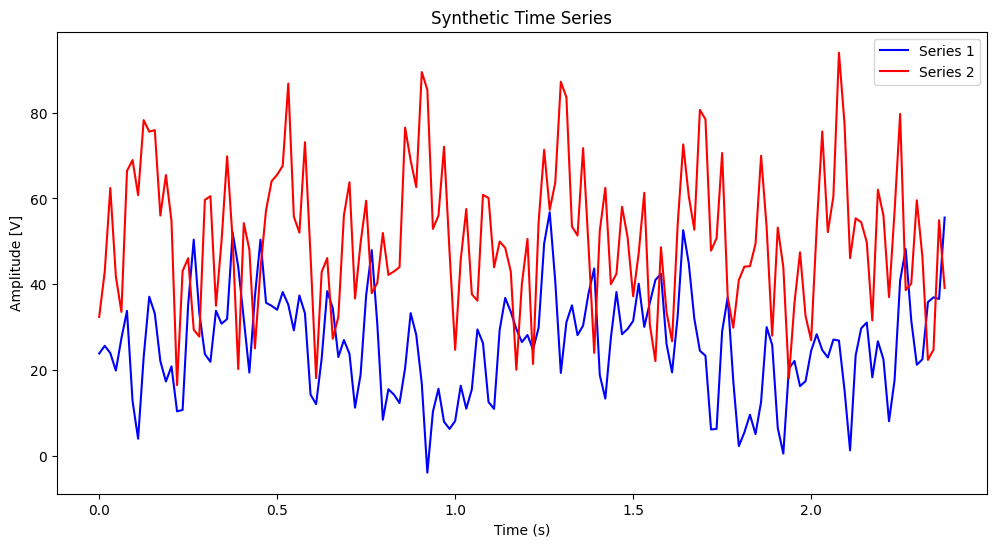

In [34]:
#add a linear trend and random noise to each series
# Linear trend
slope1 = 0.52
slope2 = -0.71
intercept1 = 25
intercept2 = 52
linear_trend1 = slope1 * t + intercept1
linear_trend2 = slope2 * t2 + intercept2

# Random noise (between the two smallest amplitudes)
l = 1
noise_amplitude = amplitudes[0]+ (amplitudes[1] - amplitudes[0]) / 2
noise1 = np.random.uniform(-l*noise_amplitude, l*noise_amplitude, len(t))
noise_amplitude2 =amplitudes2[1]+ (amplitudes2[3] - amplitudes2[1]) / 2.5
noise2 = np.random.uniform(-l*noise_amplitude2, l*noise_amplitude2, len(t2))
# Combine sinusoids, linear trend, and noise
series1 = time_series1  + linear_trend1+ noise1
series2 = time_series2 + linear_trend2+ noise2
plt.figure(figsize=(12, 6))

plt.plot(t, series1, label='Series 1', color='blue')
plt.title('Synthetic Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude [V]')
plt.plot(t, series2, label='Series 2', color='red')
plt.legend()
plt.show()

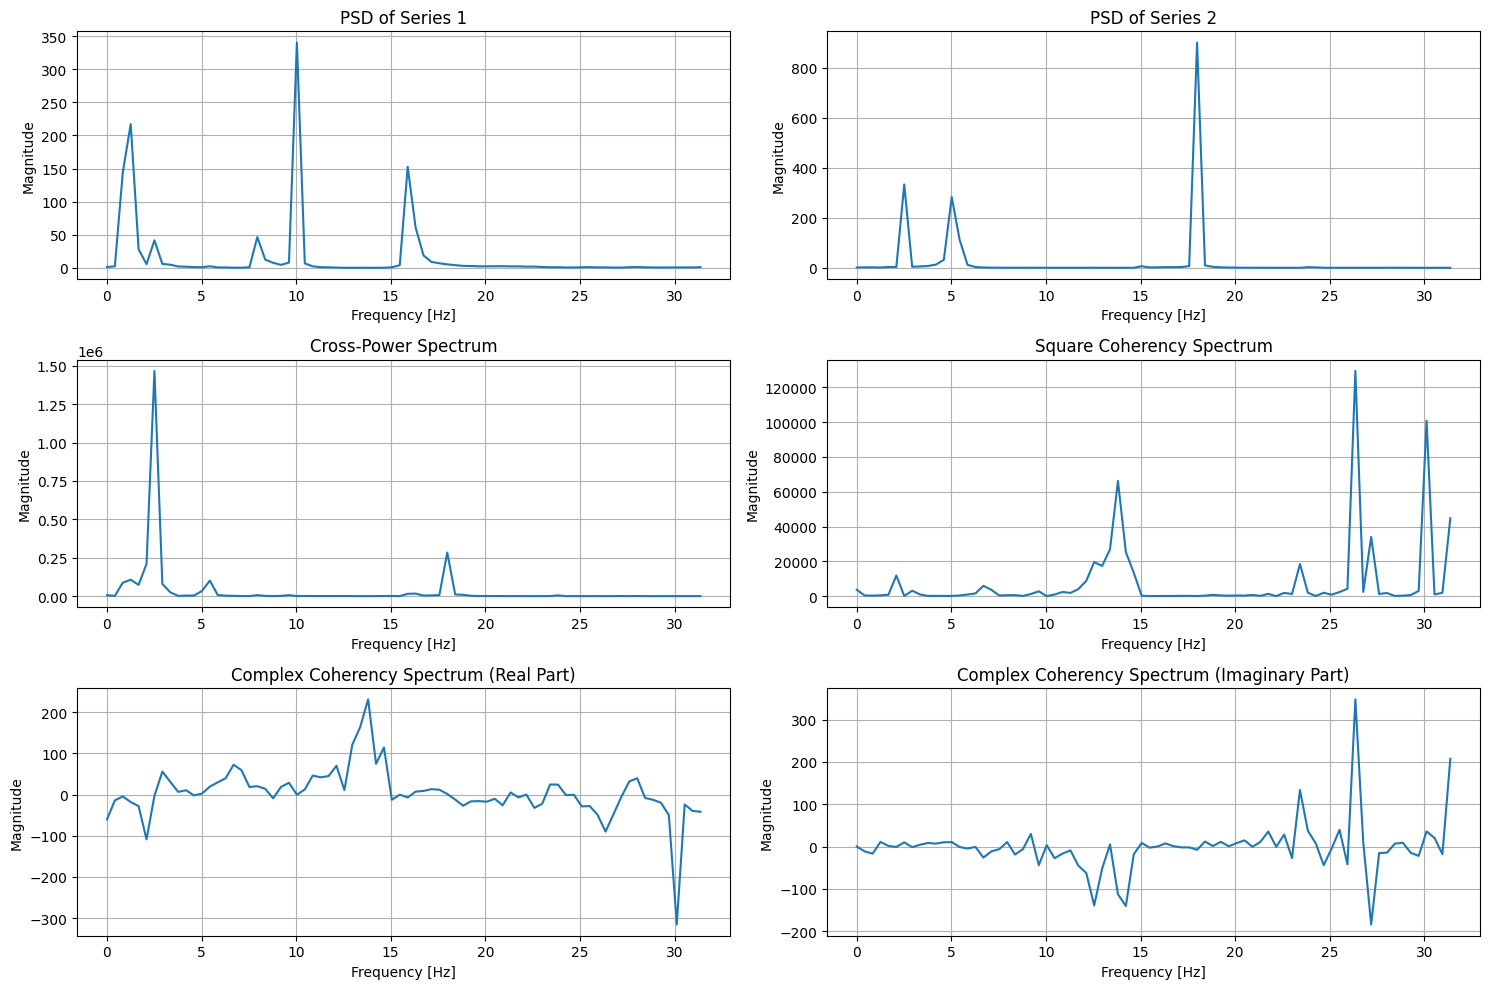

In [38]:
def autocorrelation(x):
    """Compute the autocorrelation of the signal."""
    n = len(x)
    variance = np.var(x)
    x = x - np.mean(x)
    r = np.correlate(x, x, mode='full')[-n:]
    return r / (variance * (np.arange(n, 0, -1)))

def cross_correlation(x, y):
    """Compute the cross-correlation of two signals."""
    n = max(len(x), len(y))
    x = np.pad(x, (0, n - len(x)), 'constant')
    y = np.pad(y, (0, n - len(y)), 'constant')
    x = x - np.mean(x)
    y = y - np.mean(y)
    r = np.correlate(x, y, mode='full')[n-1:]
    return r / n

def fourier_transform(signal, delta):
    """Compute the Fourier Transform of a signal."""
    n = len(signal)
    freq = np.fft.fftfreq(n, d=delta)
    spectrum = np.fft.fft(signal)
    return freq, spectrum

# Autocorrelation for PSD
auto_corr1 = autocorrelation(series1)
auto_corr2 = autocorrelation(series2)

# Cross-correlation for Cross-Power Spectrum and Cross-Power Spectral Density
cross_corr = cross_correlation(series1, series2)

# Fourier Transforms
frequencies, auto_corr1_ft = fourier_transform(auto_corr1, delta)
_, auto_corr2_ft = fourier_transform(auto_corr2, delta)
_, cross_corr_ft = fourier_transform(cross_corr, delta)

# PSD
psd1 = np.abs(auto_corr1_ft) ** 2
psd2 = np.abs(auto_corr2_ft) ** 2

# Cross-Power Spectrum
cross_power_spectrum = np.abs(cross_corr_ft) ** 2

# Cross-Power Spectral Density
cross_power_spectral_density = cross_corr_ft

# Square Coherency Spectrum
square_coherency_spectrum = np.abs(cross_corr_ft) ** 2 / (psd1 * psd2)

# Complex Coherency Spectrum
complex_coherency_spectrum = cross_corr_ft / np.sqrt(psd1 * psd2)

# Prepare to plot the results
plots = {
    "PSD of Series 1": psd1,
    "PSD of Series 2": psd2,
    "Cross-Power Spectrum": cross_power_spectrum,
    "Square Coherency Spectrum": square_coherency_spectrum,
    "Complex Coherency Spectrum (Real Part)": np.real(complex_coherency_spectrum),
    "Complex Coherency Spectrum (Imaginary Part)": np.imag(complex_coherency_spectrum)
}

# Plotting
plt.figure(figsize=(15, 10))
for i, (title, data) in enumerate(plots.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(frequencies[:len(frequencies)//2], data[:len(frequencies)//2])
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()
plt.show()